In [200]:
# Python Library
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits
import numpy as np
from astropy.table import Table, vstack, hstack
from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [201]:
plt.style.use('dark_background') # Dark 모드 스타일 적용

# Info

In [202]:
seeingarr = np.arange(1.0, 3.0+0.5, 0.5)
print(seeingarr)

[1.  1.5 2.  2.5 3. ]


In [203]:
m675depthlist = [
	19.63314948770698,
	19.192921340067777,
	18.880574498547013,
	18.638299466026886,
	18.44034635090781,
]

In [204]:
# intbl = Table.read('../data/231019.depth.seeing.ascii', format='ascii')
# intbl = Table.read('../data/231019.depth.seeing.com.ascii', format='ascii')
intbl = Table.read('../data/231019.depth.seeing.firstlight.ascii', format='ascii')
intbl[:3]

image,depth,seeing
str48,float64,float64
Calib-7DT01-NGC0253-20231010-062322-r-60.fits,20.248,2.688
Calib-7DT01-NGC0253-20231010-074943-r-60.fits,20.231,2.301
Calib-7DT01-NGC0253-20231010-075044-r-60.fits,20.308,2.139


In [205]:
intbl['filter'] = '      '

for ii, inim in enumerate(intbl['image']):
	part = inim.split('-')
	filte = part[-2]
	# exptime = float(part[-1].replace('.com.fits',''))
	# intbl['exptime'][ii] = exptime
	intbl['filter'][ii] = filte


In [206]:
filterlist = ['g', 'r', 'i', 'm675']

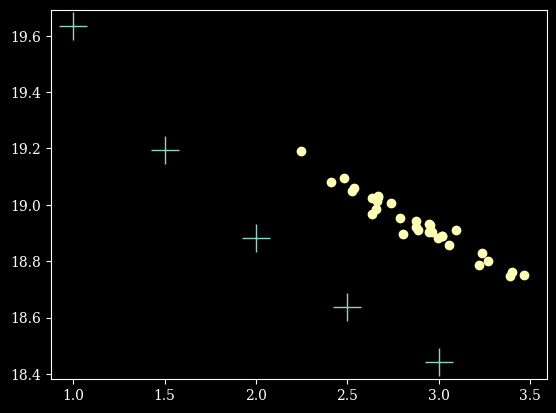

In [207]:
plt.plot(seeingarr, m675depthlist, '+', ms=20,)

filte = 'm675'
ftbl = intbl[intbl['filter']==filte]
# print(np.unique(ftbl['exptime']))
plt.plot(ftbl['seeing'], ftbl['depth'], 'o', label=f'{filte}-band')



In [215]:
from sklearn.linear_model import LinearRegression

for filte in filterlist:
	ftbl = intbl[intbl['filter']==filte]

	X = ftbl['seeing'].reshape(-1, 1)
	y = ftbl['depth'].reshape(-1, 1)

	# 선형 회귀 모델 생성 및 훈련
	model = LinearRegression()
	model.fit(X, y)

	# 예측
	y_pred = model.predict(X)

	# 결과 출력
	print('Filter:', filte)
	print('Coefficient:', model.coef_)
	print('Intercept:', model.intercept_)

Filter: g
Coefficient: [[-0.34223325]]
Intercept: [21.66836699]
Filter: r
Coefficient: [[-0.21177077]]
Intercept: [20.74843561]
Filter: i
Coefficient: [[-0.41573065]]
Intercept: [20.18011622]
Filter: m675
Coefficient: [[-0.34608692]]
Intercept: [19.93128456]


[[20.53666484]
 [20.43077945]]


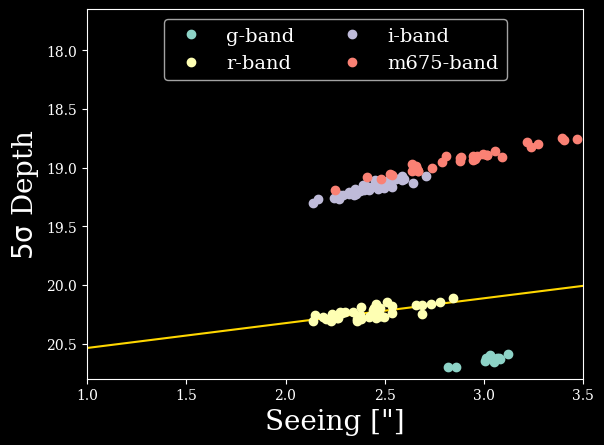

In [224]:
for filte in filterlist:
	ftbl = intbl[intbl['filter']==filte]
	# print(np.unique(ftbl['exptime']))
	plt.plot(ftbl['seeing'], ftbl['depth'], 'o', label=f'{filte}-band')

	if filte == 'r':
		X = ftbl['seeing'].reshape(-1, 1)
		y = ftbl['depth'].reshape(-1, 1)

		# 선형 회귀 모델 생성 및 훈련
		model = LinearRegression()
		model.fit(X, y)

		# 예측
		X_pred = np.arange(0.5, 4.0+0.1, 0.1).reshape(-1, 1)
		y_pred = model.predict(X_pred)
		print(model.predict(np.arange(1.0, 1.5+0.5, 0.5).reshape(-1, 1)))

		plt.plot(X_pred, y_pred, color='gold', zorder=0,)


plt.xlim([1.0, 3.5])
yl, yu = plt.ylim()
plt.ylim([yu, yl-1])
plt.legend(loc='upper center', ncol=2, fontsize=14)
plt.xlabel("""Seeing ["]""")
plt.ylabel(r"$\rm 5\sigma$ Depth")
plt.savefig('../output/depth_vs_seeing.png', transparent=True, bbox_inches='tight')